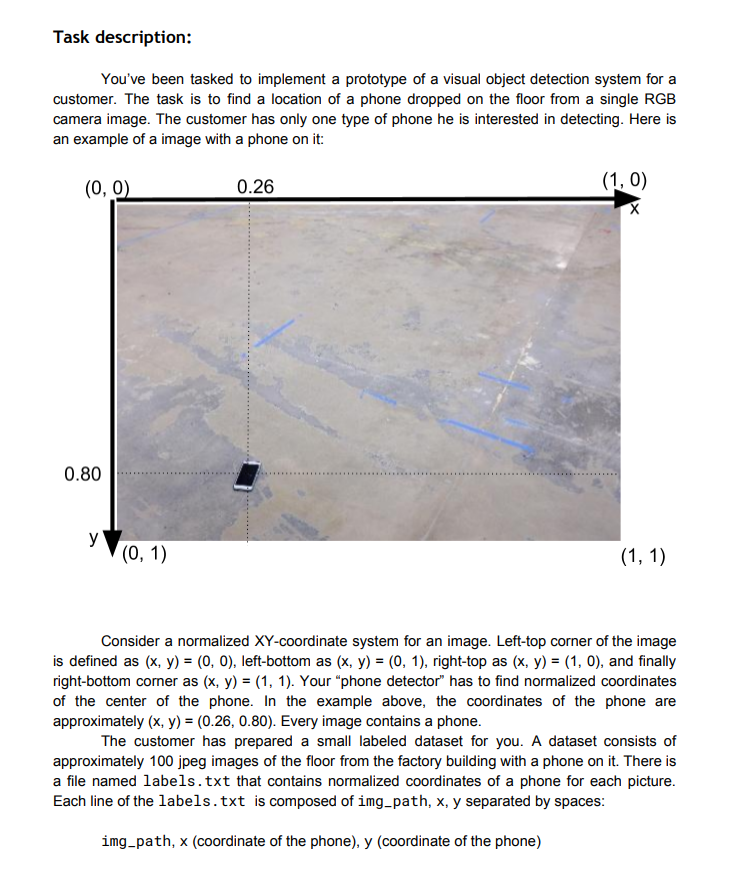

<u><font size = '3'>**First create a function to identify the location given x, y coordinates** <font></u>

In [1]:
import os
from os import walk, path, listdir
from os.path import isfile, join
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img

#get current directory 
current_dir = os.getcwd()

#find phone directory
find_phone_dir = current_dir + '\\find_phone'

#get the file names in the find phone directory
filenames = [f for f in listdir(find_phone_dir) if isfile(join(find_phone_dir, f))]

#get the image names
labels_file = filenames.pop(len(filenames)-1)
num_samples = len(filenames)

#print lists
print(labels_file, '\n')
print(filenames)
print('\nNumber of files: ', num_samples)

labels.txt 

['0.jpg', '1.jpg', '10.jpg', '100.jpg', '101.jpg', '102.jpg', '103.jpg', '104.jpg', '105.jpg', '106.jpg', '107.jpg', '108.jpg', '109.jpg', '11.jpg', '110.jpg', '111.jpg', '112.jpg', '113.jpg', '114.jpg', '115.jpg', '116.jpg', '117.jpg', '118.jpg', '119.jpg', '12.jpg', '120.jpg', '121.jpg', '122.jpg', '123.jpg', '124.jpg', '125.jpg', '126.jpg', '127.jpg', '128.jpg', '129.jpg', '13.jpg', '130.jpg', '131.jpg', '132.jpg', '133.jpg', '134.jpg', '14.jpg', '15.jpg', '16.jpg', '17.jpg', '18.jpg', '20.jpg', '22.jpg', '23.jpg', '24.jpg', '25.jpg', '26.jpg', '27.jpg', '29.jpg', '3.jpg', '30.jpg', '31.jpg', '32.jpg', '33.jpg', '34.jpg', '35.jpg', '36.jpg', '37.jpg', '38.jpg', '39.jpg', '4.jpg', '40.jpg', '41.jpg', '42.jpg', '43.jpg', '44.jpg', '45.jpg', '46.jpg', '47.jpg', '48.jpg', '49.jpg', '5.jpg', '50.jpg', '51.jpg', '52.jpg', '53.jpg', '54.jpg', '55.jpg', '57.jpg', '58.jpg', '59.jpg', '6.jpg', '60.jpg', '61.jpg', '62.jpg', '63.jpg', '64.jpg', '66.jpg', '67.jpg', '68.jpg', '69.jpg

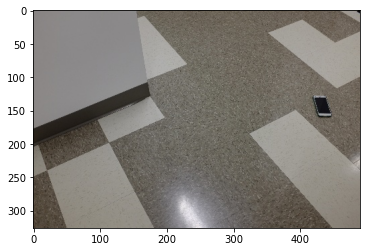

In [2]:
#open a random image and plot
random_image = np.random.choice(filenames)
im = img.imread(find_phone_dir + '\\' + random_image)
plt.imshow(im)
plt.show()

In [3]:
#get the label files
label = open(find_phone_dir + '\\' + str(labels_file), 'r')
labels = label.read()
label_list = labels.split('\n')

#delete the last element ('')
label_list.pop()
print('\nThe number of coordinates and labels availabel: ', len(label_list), '\n')

print(label_list)


The number of coordinates and labels availabel:  129 

['51.jpg 0.2388 0.6012', '95.jpg 0.2551 0.3129', '84.jpg 0.7122 0.7117', '118.jpg 0.5286 0.4877', '115.jpg 0.7714 0.3252', '33.jpg 0.1122 0.3466', '58.jpg 0.8449 0.1564', '119.jpg 0.4837 0.4509', '38.jpg 0.2612 0.8037', '8.jpg 0.6551 0.3466', '47.jpg 0.1878 0.1104', '131.jpg 0.7837 0.6503', '48.jpg 0.6020 0.1135', '130.jpg 0.1490 0.6442', '93.jpg 0.8061 0.2699', '50.jpg 0.4082 0.7791', '112.jpg 0.4327 0.8405', '121.jpg 0.2286 0.8712', '97.jpg 0.7571 0.4264', '120.jpg 0.8367 0.7147', '99.jpg 0.3714 0.5307', '82.jpg 0.5980 0.1258', '54.jpg 0.6837 0.7485', '74.jpg 0.2531 0.2117', '78.jpg 0.7551 0.4847', '128.jpg 0.6939 0.2975', '83.jpg 0.5837 0.2117', '75.jpg 0.7796 0.7454', '37.jpg 0.8490 0.6626', '86.jpg 0.2347 0.2209', '45.jpg 0.8857 0.4387', '110.jpg 0.5592 0.5767', '113.jpg 0.5163 0.5000', '61.jpg 0.3347 0.3436', '100.jpg 0.8204 0.8558', '132.jpg 0.2878 0.4448', '12.jpg 0.1857 0.8589', '129.jpg 0.1898 0.2669', '6.jpg 0.3531 0.77

In [4]:
#add file name and coordinates to a dictionary 
coords = {}

for name in label_list:
    
    name_split = name.split(' ')
    coords[name_split[0]] = tuple((float(name_split[1]), float(name_split[2])))

<font size = '3'> <u>**Check data**</u></font>



Length of pix_x:  129
Length of pix_y:  129
Number of pixels in x:  [490]
Number of pixels in y:  [326]


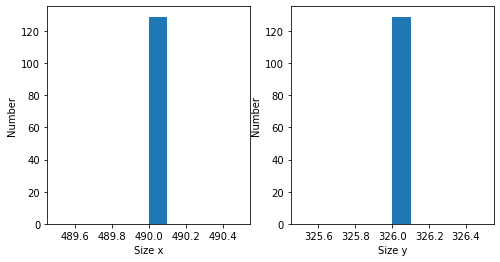

In [5]:
#first check if all the images are the same size
pix_x = []
pix_y = []

#get the x and y shapes of the images 
for i in range(len(filenames)):
    
    im = img.imread(find_phone_dir + '\\' + filenames[i])
    pix_x.append(im.shape[1])
    pix_y.append(im.shape[0])
    
print('Length of pix_x: ', len(pix_x))
print('Length of pix_y: ', len(pix_y))
print('Number of pixels in x: ', np.unique(pix_x)) #to make sure all the pixels are the same size
print('Number of pixels in y: ', np.unique(pix_y))

#plot to see if all the images have the same pixel size in x and y directions. to double check.
fig, ax = plt.subplots(1, 2)
fig.set_figwidth(8)
ax[0].hist(pix_x)
ax[1].hist(pix_y)
ax[0].set_ylabel('Number')
ax[0].set_xlabel('Size x')
ax[1].set_ylabel('Number')
ax[1].set_xlabel('Size y')
plt.show()

- The number of pixels in the x direction of all images is 490
- The number of pixels in the y direction of all images is 326

Flattening the images and normalizing.

- Each image vector should be of length (1, 326 x 490 x 3)

In [6]:
#vector length
vec_length = 326 * 490 * 3

#get all the images to one vector
X = np.zeros([num_samples, vec_length])

#create vector for Y for x and y coordinates
Y = np.zeros([num_samples, 2])

for i in range(len(filenames)):
    
    im_orig = img.imread(find_phone_dir + '\\' + filenames[i])
    im_flattened = im_orig.reshape(1, -1)
    im = im_flattened/255
    
    X[i, :] = im
    Y[i, 0] = coords[filenames[i]][0]
    Y[i, 1] = coords[filenames[i]][1]
    
    X_orig = im_orig/255

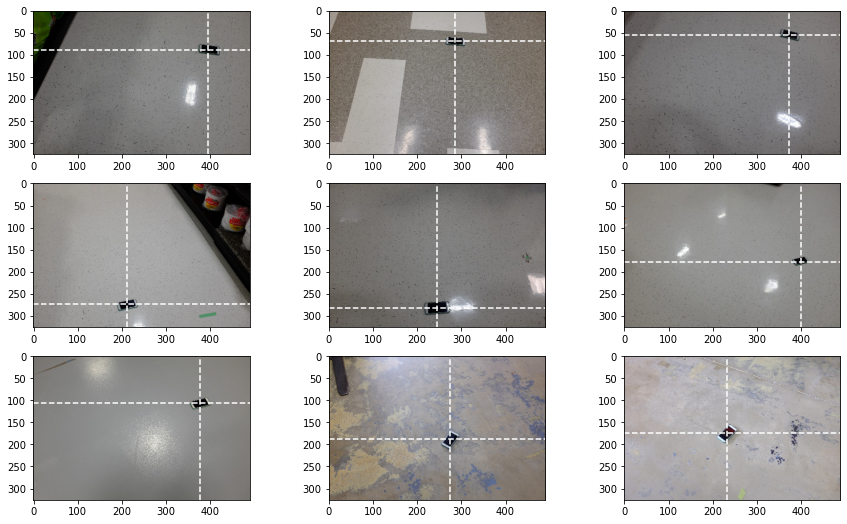

In [7]:
#plot a few figures and see if everything is organized correctly 
random_index = np.random.choice(np.arange(0, 128), 9)

fig, axs = plt.subplots(3, 3, figsize=(15, 9))
axs = axs.ravel()

for i in range(len(random_index)):
    
    im = img.imread(find_phone_dir + '\\' + filenames[random_index[i]])
    x_coord = coords[filenames[random_index[i]]][0] * 490
    y_coord = coords[filenames[random_index[i]]][1] * 326
    axs[i].axhline(y = y_coord, xmin = 0, xmax = 490, linestyle = '--', color = 'w')
    axs[i].axvline(x = x_coord, ymin = 0, ymax = 326, linestyle = '--', color = 'w')
    axs[i].imshow(im)

In [8]:
#save to a csv file
import pandas as pd

#create a dataframe and add filenames
df = pd.DataFrame()
df['FileName'] = filenames

#add the pixels
df = pd.concat([df, pd.DataFrame(X)], axis = 1)

#add the x and y coordinates
df['XCoords'] = Y[:, 0]
df['YCoords'] = Y[:, 1]

df.head(5)

,FileName,0,1,2,3,4,5,6,7,8,...,479212,479213,479214,479215,479216,479217,479218,479219,XCoords,YCoords
0,0.jpg,0.478431,0.462745,0.450980,0.482353,0.466667,0.454902,0.505882,0.490196,0.478431,...,0.654902,0.650980,0.686275,0.670588,0.666667,0.682353,0.666667,0.662745,0.8306,0.1350
1,1.jpg,0.333333,0.270588,0.207843,0.309804,0.247059,0.184314,0.407843,0.345098,0.286275,...,0.564706,0.505882,0.607843,0.572549,0.513725,0.603922,0.568627,0.509804,0.8714,0.1718
2,10.jpg,0.482353,0.443137,0.403922,0.486275,0.447059,0.407843,0.470588,0.431373,0.392157,...,0.031373,0.019608,0.043137,0.027451,0.015686,0.043137,0.027451,0.015686,0.4918,0.4356
3,100.jpg,0.019608,0.011765,0.015686,0.011765,0.003922,0.007843,0.027451,0.019608,0.023529,...,0.411765,0.400000,0.419608,0.400000,0.388235,0.419608,0.400000,0.388235,0.8204,0.8558
4,101.jpg,0.686275,0.650980,0.631373,0.694118,0.658824,0.639216,0.698039,0.662745,0.643137,...,0.596078,0.600000,0.600000,0.580392,0.596078,0.603922,0.584314,0.600000,0.2000,0.6503


**CNN Model**

In [43]:
import random

from PIL import Image, ImageDraw

import tensorflow as tf


from tensorflow.keras.layers import Input, Dense, Flatten, Conv2D, MaxPool2D, BatchNormalization, Dropout, ZeroPadding2D, \
Activation, Add, AveragePooling2D

from tensorflow.keras.models import Model

from tensorflow.keras.initializers import random_uniform, glorot_uniform, constant, identity

In [13]:
#get the files
random.seed = 0
filenames = random.sample(filenames, len(filenames))

In [14]:
#get all the images to one vector
X = np.zeros([num_samples, 326, 490, 3])

#create vector for Y for x and y coordinates
Y = np.zeros([num_samples, 2])

for i in range(len(filenames)):
    
    im = img.imread(find_phone_dir + '\\' + filenames[i])   
    X[i, :] = im
    Y[i, 0] = coords[filenames[i]][0]
    Y[i, 1] = coords[filenames[i]][1]

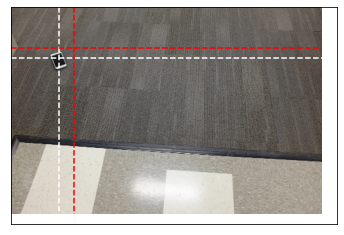

In [15]:
#function to plot the photo, center and predicted center
def plot_data(image, gt_coord, pred_coord = None):
    
    #extract coordinates
    x_coord, y_coord = gt_coord
    
    plt.imshow(image.astype('uint8'))
    plt.hlines(y = y_coord * 326, xmin = 0, xmax = 490, linestyle = '--', color = 'w')
    plt.vlines(x = x_coord * 490, ymin = 0, ymax = 326, linestyle = '--', color = 'w')
    plt.xticks([])
    plt.yticks([])
    
    if len(pred_coord) > 1:
        
        x_pred, y_pred = pred_coord
        plt.hlines(y = y_pred * 326, xmin = 0, xmax = 490, linestyle = '--', color = 'r')
        plt.vlines(x = x_pred * 490, ymin = 0, ymax = 326, linestyle = '--', color = 'r')
        
    plt.show()
        
plot_data(X[100], (Y[100, 0], Y[100, 1]), (Y[100, 0] + 0.05, Y[100, 1] - 0.05))

In [16]:
#split to test and train sets. First split the first 100 as train and the rest as test
X_train = X[:100]/255
print('X train shape: ', X_train.shape)
X_test = X[100: len(X)]/255
X_test_orig = X[100: len(X)]
print('X test shape: ', X_test.shape)

Y_train = Y[:100]
print('Y train shape: ', Y_train.shape)
Y_test = Y[100: len(X)]
print('Y test shape: ', Y_test.shape)

#put the train images and coordinates to a dictionary
inp = {'images': X_train}
out = {'coords': Y_train}

X train shape:  (100, 326, 490, 3)
X test shape:  (29, 326, 490, 3)
Y train shape:  (100, 2)
Y test shape:  (29, 2)


In [94]:
#create the model simpole convolution neural network model 

def find_phone(input_size):
    
    #specify input
    X_input = Input(input_size)
    
    #send through three convolution layers
    X = ZeroPadding2D((3,3))(X_input)
    
    #conv
    X = Conv2D(8, (7, 7), strides = (1, 1), name = 'conv1')(X)
    X = BatchNormalization(axis = 3, name = 'bn1')(X)
    X = Activation('relu')(X)
    
    #conv 2
    X = Conv2D(16, (5, 5), strides = (1, 1), name = 'conv2')(X)
    X = BatchNormalization(axis = 3, name = 'bn2')(X)
    X = Activation('relu')(X)
    
    #conv3
    X = Conv2D(32, (3, 3), strides = (1, 1), name = 'conv3')(X)
    X = BatchNormalization(axis = 3, name = 'bn3')(X)
    X = Activation('relu')(X)
    
    #max pool
    X = MaxPool2D((2, 2), name = 'max_pool')(X)
    
    #flatten and output 
    X = Flatten()(X)
    X = Dense(2)(X)
    
    model = Model(inputs = X_input, outputs = X, name = 'find_phone')
    
    return model
    

In [95]:
#initialize the model
model = find_phone(X_train[1,:].shape)

model.compile(loss = 'mse',
    optimizer = tf.keras.optimizers.Adam(), metrics = ['MeanSquaredError'])

In [96]:
preds = model.fit(x = X_train, y = Y_train, epochs = 50, batch_size = 10)

Epoch 1/50
10/10 [==============================] - 30s 3s/step - loss: 116654.4922 - mean_squared_error: 116654.4922
Epoch 2/50
10/10 [==============================] - 31s 3s/step - loss: 30651.1055 - mean_squared_error: 30651.1055
Epoch 3/50
10/10 [==============================] - 32s 3s/step - loss: 15173.4561 - mean_squared_error: 15173.4561
Epoch 4/50
10/10 [==============================] - 32s 3s/step - loss: 4722.9404 - mean_squared_error: 4722.9404
Epoch 5/50
10/10 [==============================] - 31s 3s/step - loss: 2568.9988 - mean_squared_error: 2568.9988
Epoch 6/50
10/10 [==============================] - 32s 3s/step - loss: 1435.6975 - mean_squared_error: 1435.6975
Epoch 7/50
10/10 [==============================] - 31s 3s/step - loss: 474.9618 - mean_squared_error: 474.9618
Epoch 8/50
10/10 [==============================] - 33s 3s/step - loss: 306.0948 - mean_squared_error: 306.0948
Epoch 9/50
10/10 [==============================] - 31s 3s/step - loss: 175.5498 - m

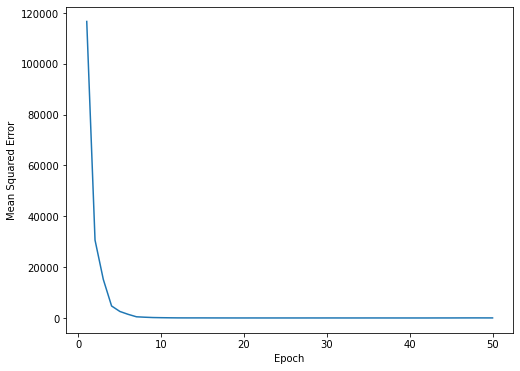

In [100]:
#plot the epochs vs mse
plt.figure(figsize = (8, 6))
plt.plot(np.arange(1, 51), preds.history['loss'])
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.show()

The mean squared error is still pretty large given that the x and y coordinates are between 0 and 1. If the model predicts values properly ideally we should get a mse below 1. 

Since the bayesian model was able to predict well on black and white images we can now try to turn the image into black and white and then use a CNN model to predict the dimensions of the phone. This might give better results on this occastion because the phone model is the same and the cover is white and the screen of the phone is always black. We will use different thresholds to set a pixel either black or white like before in the bayesian model. We will call this threshold alpha and we will find the alpha with the lowest mse. 

**Convert to grayscale**



In [66]:
#convert the data to black and white
def to_bandw(X, alpha):
    """
    X - data
    alpha - is the threshold to set either black or white
    """
    
    #convert the images to gray scale
    rgb_weights = [0.2989, 0.5870, 0.1140]
    
    #convert to gray scale
    X = X @ rgb_weights

    #black and white image
    X[X <= alpha] = 0 #black
    X[X > alpha] = 255 #white

    return X

In [67]:
#convert the training set to black and white with alpha 15 for now
X_bw15 = to_bandw(X, 55)

print('Shape of the converted X train matrix: ', X_bw15.shape)


Shape of the converted X train matrix:  (129, 326, 490)


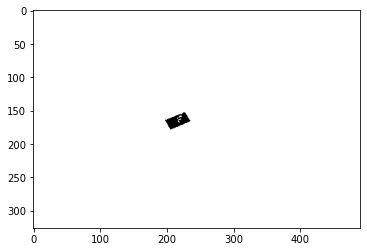

In [68]:
#plot a few samples
rand_int = np.random.choice(np.arange(0, 100))

plt.imshow(X_bw15[rand_int].astype('uint8'), cmap=plt.get_cmap("gray"))
plt.show()

In [131]:
#split to train and test sets
X_train = X[:100]
Y_train = Y[:100]
X_test = X[100:len(X)]
Y_test = Y[100: len(X)]

Let's try the new dataset with the black and white images to see if they perform better this time.

In [69]:
#convert the X_train to black and white images with alpha = 55
X_trainbw = to_bandw(X_train, 55)
X_trainbw = X_trainbw.reshape(X_trainbw.shape[0], X_trainbw.shape[1], X_trainbw.shape[2], -1)
print('Shape of the training set: ', X_trainbw.shape)

Shape of the training set:  (100, 326, 490, 1)


In [175]:
#create the model simpole convolution neural network model 

def find_phone_bw(input_size):
    
    #specify input
    X_input = Input(input_size)
    
    #send through three convolution layers
    X = ZeroPadding2D((3, 1))(X_input)
    
    #conv
    X = Conv2D(8, (7, 7), strides = (1, 1), name = 'conv1')(X)
    X = BatchNormalization(axis = 1, name = 'bn1')(X)
    X = Activation('relu')(X)
    
    #conv 2
    X = Conv2D(16, (5, 5), strides = (1, 1), name = 'conv2')(X)
    X = BatchNormalization(axis = 1, name = 'bn2')(X)
    X = Activation('relu')(X)
    
    #conv3
    X = Conv2D(32, (3, 3), strides = (1, 1), name = 'conv3')(X)
    X = BatchNormalization(axis = 1, name = 'bn3')(X)
    X = Activation('relu')(X)
    
    #max pool
    X = MaxPool2D((2, 2), name = 'max_pool')(X)
    
    #flatten and output 
    X = Flatten()(X)
    X = Dense(2)(X)
    
    model = Model(inputs = X_input, outputs = X, name = 'find_phone_bw')
    
    return model

In [176]:
#create the model 
model_bw = find_phone_bw(X_trainbw[1,:].shape)

#early stopping
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

model_bw.compile(loss = 'mse',
    optimizer = tf.keras.optimizers.Adam(), metrics = ['MeanSquaredError'])

In [177]:
#fit the model with early stopping
history = model_bw.fit(x = X_trainbw, y = Y_train, epochs = 50, batch_size = 10, callbacks = [callback])

Epoch 1/50
10/10 [==============================] - 44s 4s/step - loss: 52098.5117 - mean_squared_error: 52098.5117
Epoch 2/50
10/10 [==============================] - 43s 4s/step - loss: 7685.2588 - mean_squared_error: 7685.2588
Epoch 3/50
10/10 [==============================] - 44s 4s/step - loss: 2605.8362 - mean_squared_error: 2605.8362
Epoch 4/50
10/10 [==============================] - 44s 4s/step - loss: 670.4673 - mean_squared_error: 670.4673
Epoch 5/50
10/10 [==============================] - 44s 4s/step - loss: 268.8341 - mean_squared_error: 268.8341
Epoch 6/50
10/10 [==============================] - 44s 4s/step - loss: 82.8976 - mean_squared_error: 82.8976
Epoch 7/50
10/10 [==============================] - 44s 4s/step - loss: 8.8771 - mean_squared_error: 8.8771
Epoch 8/50
10/10 [==============================] - 44s 4s/step - loss: 11.4657 - mean_squared_error: 11.4657
Epoch 9/50
10/10 [==============================] - 44s 4s/step - loss: 4.1291 - mean_squared_error: 4.1

In [80]:
#atest the predictions
X_testbw = to_bandw(X_test, 55)
X_testbw = X_testbw.reshape(X_testbw.shape[0], X_testbw.shape[1], X_testbw.shape[2], -1)

In [182]:
#predict from the model
predictions_m2 = model_bw.predict(X_testbw)

In [183]:
predictions_m2

array([[-7.39175022e-01,  1.37028885e+00],
       [-1.00232296e-01,  7.17744768e-01],
       [-2.69161963e+00,  3.34297323e+00],
       [-2.19303310e-01,  8.20445955e-01],
       [ 7.71420673e-02,  6.13913476e-01],
       [-1.16596870e-01,  6.85356081e-01],
       [ 4.34102631e+00, -4.33989334e+00],
       [-4.09697711e-01,  9.78495538e-01],
       [ 1.42770588e-01,  4.89190549e-01],
       [-2.35991812e+00,  2.30306482e+00],
       [-7.55655944e-01,  1.31734133e+00],
       [ 7.85434917e-02,  5.53135812e-01],
       [-1.73114955e-01,  8.20794046e-01],
       [ 7.18692020e-02,  5.33194005e-01],
       [ 4.95479740e-02,  4.50300664e-01],
       [-9.59197804e-02,  7.05447137e-01],
       [-5.76240383e-02,  6.83850706e-01],
       [ 2.31678784e-01,  3.19511384e-01],
       [-6.37234306e+00,  6.69433403e+00],
       [-1.99315250e-01,  8.16857278e-01],
       [-4.36085043e-03,  6.01450384e-01],
       [ 7.09951594e-02,  4.68749493e-01],
       [-1.27329600e+00,  1.78108644e+00],
       [-1.

In [201]:
#test mean squared error
model_bw.evaluate(X_testbw, Y_test)

1/1 [==============================] - 0s 985us/step - loss: 3.0784 - mean_squared_error: 3.0784


[3.078359842300415, 3.078359842300415]

The MSE is still pretty high. Now let's train a Residual Network to see the performance of the model.

**Residual Network**

In [37]:
#let's create identity blocks. THe identity block will have skip connections without convolutions 
def identity_block(X, f, filters, training = True, initializer = random_uniform):
    
    #get the filters 
    F1, F2, F3 = filters
    
    #save the input value to add later (skip connections)
    X_skip = X
    
    #first layer of this block 
    X = Conv2D(filters = F1, kernel_size = 1, strides = (1, 1), padding = 'valid', kernel_initializer = initializer(seed = 0))(X)
    X = BatchNormalization(axis = 3)(X, training = training)
    X = Activation('relu')(X)
    
    #second layer of identity block 
    X = Conv2D(filters = F2, kernel_size = f, strides = (1, 1), padding = 'same', kernel_initializer = initializer(seed = 0))(X)
    X = BatchNormalization(axis = 3)(X, training = training)
    X = Activation('relu')(X)
    
    #third layer of identity block
    X = Conv2D(filters = F3, kernel_size = 1, strides = (1, 1), padding = 'valid', kernel_initializer = initializer(seed = 0))(X)
    X = BatchNormalization(axis = 3)(X, training = training)
    
    #add the skip connection before the activation
    X = Add()([X, X_skip])
    X = Activation('relu')(X)
    
    return X

#next add a convolutional block 
def convolutional_block(X, f, filters, s = 2,training = True, initializer = random_uniform):
    
    #get filter values
    F1, F2, F3 = filters
    
    #skip connection
    X_skip = X
    
    #main path 1st layer
    X = Conv2D(filters = F1, kernel_size = 1, strides = (1, 1), padding = 'valid', kernel_initializer = initializer(seed = 0))(X)
    X = BatchNormalization(axis = 3)(X, training = training)
    X = Activation('relu')(X)
    
    #main path 2nd layer
    X = Conv2D(filters = F2, kernel_size = f, strides= (1, 1), padding = 'same', kernel_initializer = initializer(seed = 0))(X)
    X = BatchNormalization(axis = 3)(X, training = training)
    X = Activation('relu')(X)
    
    #main path 3rd layer
    X = Conv2D(filters = F3, kernel_size = 1, strides = (1, 1), padding = 'valid', kernel_initializer = initializer(seed = 0))(X)
    X = BatchNormalization(axis = 3)(X, training = training)
    
    #add convolution to the skip layer
    X_skip = Conv2D(filters = F3, kernel_size = 1, strides = (s, s), padding = 'valid', kernel_initializer = initializer(seed = 0))(X_skip)
    X_skip = BatchNormalization(axis = 3)(X_skip, training = training)
    
    #add the skip connection 
    X = Add()([X, X_skip])
    X = Activation('relu')(X)
    
    return X  
    

In [58]:
#now create a residual network. Will only create a simple model that will run in CPU
def res_model(input_shape):
    
    #input 
    X_input = Input(input_shape)
    
    #zero padding
    X = ZeroPadding2D((3, 3))(X_input)
    
    #first layer
    X = Conv2D(64, (7, 7), strides = (2, 2), kernel_initializer = glorot_uniform(seed = 0))(X)
    X = BatchNormalization(axis = 3)(X)
    X = Activation('relu')(X)
    X = MaxPool2D((3, 3), strides = (2, 2))(X)
    
    #add conv and identity blocks
    X = convolutional_block(X, f = 3, filters = [64, 64, 256], s = 1)
    X = identity_block(X, 3, [64, 64, 256])
    X = identity_block(X, 3, [64, 64, 256])
    
#     #add another conv and identity bloc
    #X = convolutional_block(X, f = 3, filters = [128, 128, 512], s = 2)
#     X = identity_block(X, 3, [128, 128, 512])
    
#     #another conv and identity block
#     X = convolutional_Block(X, f = 3, filters = [256, 256, 1024], s = 2)
#     X = identity_block(X, 3, [256, 256, 1024])
#     X = identity_block(X, 3, [256, 256, 1024])
    
    X = AveragePooling2D((2, 2))(X)
    
    #output
    X = Flatten()(X)
    X = Dense(2)(X)
    
    model = Model(inputs = X_input, outputs = X, name = 'find_phone_bw')
    
    return model

In [59]:
model_rn = res_model(X_train[0, :, :, :].shape)
model_rn.summary()

Model: "find_phone_bw"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_14 (InputLayer)           [(None, 326, 490, 3) 0                                            
__________________________________________________________________________________________________
zero_padding2d_13 (ZeroPadding2 (None, 332, 496, 3)  0           input_14[0][0]                   
__________________________________________________________________________________________________
conv2d_98 (Conv2D)              (None, 163, 245, 64) 9472        zero_padding2d_13[0][0]          
__________________________________________________________________________________________________
batch_normalization_98 (BatchNo (None, 163, 245, 64) 256         conv2d_98[0][0]                  
______________________________________________________________________________________

In [60]:
#compile the model
model_rn.compile(loss = 'mse',
    optimizer = tf.keras.optimizers.Adam(), metrics = ['MeanSquaredError'])

In [62]:
#train the model

#early stopping
#callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

history_rn = model_rn.fit(x = X_train, y = Y_train, epochs = 50, batch_size = 10)

Epoch 1/50
10/10 [==============================] - 55s 5s/step - loss: 3.6320 - mean_squared_error: 3.6320
Epoch 2/50
10/10 [==============================] - 54s 5s/step - loss: 2.7752 - mean_squared_error: 2.7752
Epoch 3/50
10/10 [==============================] - 54s 5s/step - loss: 1.8479 - mean_squared_error: 1.8479
Epoch 4/50
10/10 [==============================] - 54s 5s/step - loss: 4.2276 - mean_squared_error: 4.2276
Epoch 5/50
10/10 [==============================] - 55s 5s/step - loss: 1.7410 - mean_squared_error: 1.7410
Epoch 6/50
10/10 [==============================] - 52s 5s/step - loss: 2.3101 - mean_squared_error: 2.3101
Epoch 7/50
10/10 [==============================] - 53s 5s/step - loss: 1.6555 - mean_squared_error: 1.6555
Epoch 8/50
10/10 [==============================] - 54s 5s/step - loss: 1.3982 - mean_squared_error: 1.3982
Epoch 9/50
10/10 [==============================] - 53s 5s/step - loss: 1.6516 - mean_squared_error: 1.6516
Epoch 10/50
10/10 [=========

KeyboardInterrupt: 

Looks like the loss is increasing after epoch 15 and the loss is still above 1. Now lets try the same model on the black and white images. This should ideally perform better than the colored images.

In [76]:
#now create a residual network. Will only create a simple model that will run in CPU
def res_model_bw(input_shape):
    
    #input 
    X_input = Input(input_shape)
    
    #zero padding
    X = ZeroPadding2D((3, 1))(X_input)
    
    #first layer
    X = Conv2D(64, (7, 7), strides = (2, 2), kernel_initializer = glorot_uniform(seed = 0))(X)
    X = BatchNormalization(axis = 3)(X)
    X = Activation('relu')(X)
    X = MaxPool2D((3, 3), strides = (2, 2))(X)
    
    #add conv and identity blocks
    X = convolutional_block(X, f = 3, filters = [64, 64, 256], s = 1)
    X = identity_block(X, 3, [64, 64, 256])
    X = identity_block(X, 3, [64, 64, 256])
    
#     #add another conv and identity bloc
    #X = convolutional_block(X, f = 3, filters = [128, 128, 512], s = 2)
#     X = identity_block(X, 3, [128, 128, 512])
    
#     #another conv and identity block
#     X = convolutional_Block(X, f = 3, filters = [256, 256, 1024], s = 2)
#     X = identity_block(X, 3, [256, 256, 1024])
#     X = identity_block(X, 3, [256, 256, 1024])
    
    X = AveragePooling2D((2, 2))(X)
    
    #output
    X = Flatten()(X)
    X = Dense(2)(X)
    
    model = Model(inputs = X_input, outputs = X, name = 'find_phone_bw')
    
    return model

In [77]:
model_rn_bw = res_model_bw(X_trainbw[0, :, :, :].shape)
model_rn_bw.compile(loss = 'mse',
    optimizer = tf.keras.optimizers.Adam(), metrics = ['MeanSquaredError'])

In [78]:
#train the model
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
history_rn_bw = model_rn_bw.fit(x = X_trainbw, y = Y_train, epochs = 50, batch_size = 10, callbacks = callback)

Epoch 1/50
10/10 [==============================] - 57s 6s/step - loss: 0.3027 - mean_squared_error: 0.3027
Epoch 2/50
10/10 [==============================] - 54s 5s/step - loss: 0.2929 - mean_squared_error: 0.2929
Epoch 3/50
10/10 [==============================] - 58s 6s/step - loss: 0.2836 - mean_squared_error: 0.2836
Epoch 4/50
10/10 [==============================] - 54s 5s/step - loss: 0.2743 - mean_squared_error: 0.2743
Epoch 5/50
10/10 [==============================] - 54s 5s/step - loss: 0.2651 - mean_squared_error: 0.2651
Epoch 6/50
10/10 [==============================] - 59s 6s/step - loss: 0.2565 - mean_squared_error: 0.2565
Epoch 7/50
10/10 [==============================] - 55s 5s/step - loss: 0.2481 - mean_squared_error: 0.2481
Epoch 8/50
10/10 [==============================] - 63s 6s/step - loss: 0.2399 - mean_squared_error: 0.2399
Epoch 9/50
10/10 [==============================] - 63s 6s/step - loss: 0.2320 - mean_squared_error: 0.2320
Epoch 10/50
10/10 [=========

In [82]:
#predict the test data
predictions_rn_bw = model_rn_bw.predict(X_testbw)

predictions_rn_bw

array([[0.36775273, 0.36807126],
       [0.36775273, 0.36807126],
       [0.36775273, 0.36807126],
       [0.36775273, 0.36807126],
       [0.36775273, 0.36807126],
       [0.36775273, 0.36807126],
       [0.36775273, 0.36807126],
       [0.36775273, 0.36807126],
       [0.36775273, 0.36807126],
       [0.36775273, 0.36807126],
       [0.36775273, 0.36807126],
       [0.36775273, 0.36807126],
       [0.36775273, 0.36807126],
       [0.36775273, 0.36807126],
       [0.36775273, 0.36807126],
       [0.36775273, 0.36807126],
       [0.36775273, 0.36807126],
       [0.36775273, 0.36807126],
       [0.36775273, 0.36807126],
       [0.36775273, 0.36807126],
       [0.36775273, 0.36807126],
       [0.36775273, 0.36807126],
       [0.36775273, 0.36807126],
       [0.36775273, 0.36807126],
       [0.36775273, 0.36807126],
       [0.36775273, 0.36807126],
       [0.36775273, 0.36807126],
       [0.36775273, 0.36807126],
       [0.36775273, 0.36807126]], dtype=float32)

The accuracy of detection:  0.0


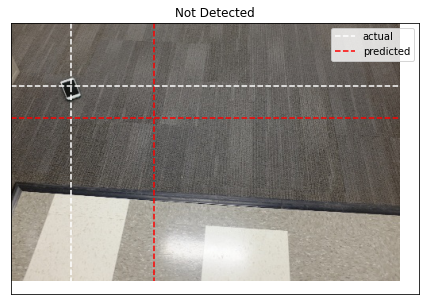

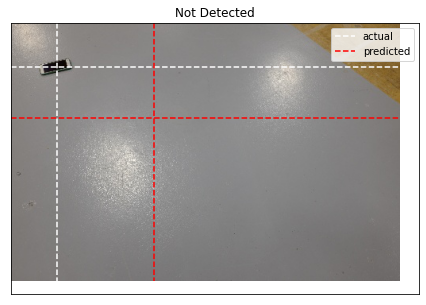

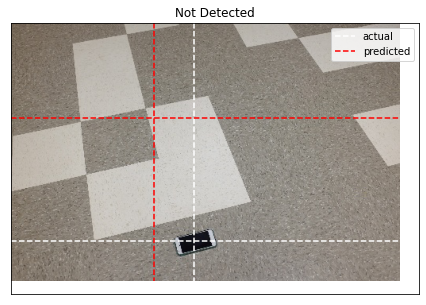

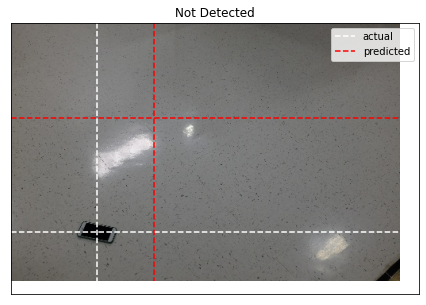

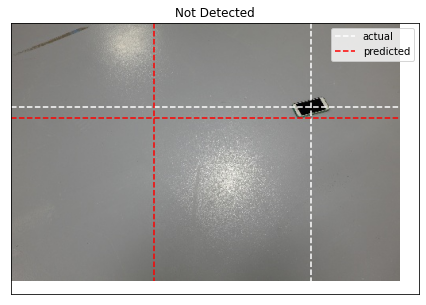

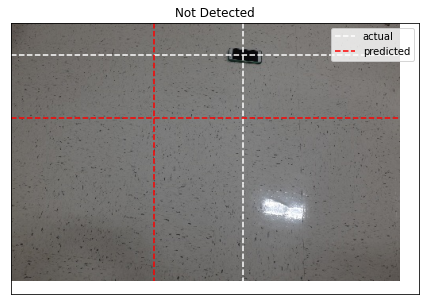

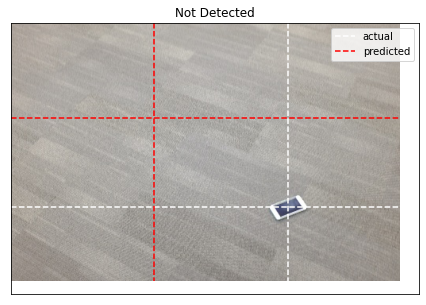

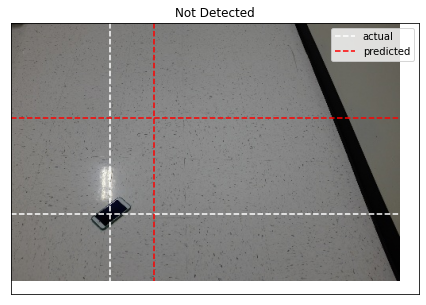

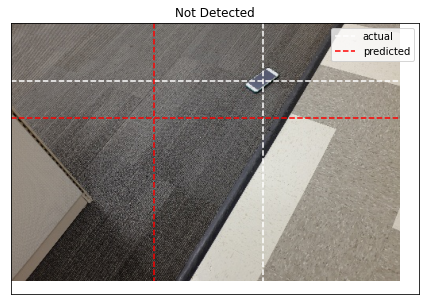

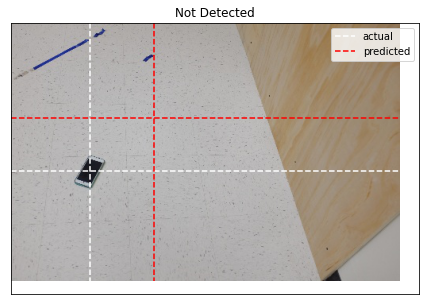

In [96]:
#see if a phone is detected or not

correct = []

#use the prior to calculate the posterior
for t in range(len(Y_test)):
    
    #calculate the posterior   

    #find the estimate
    phone_x = np.round(predictions_rn_bw[t][0], 4)
    phone_y = np.round(predictions_rn_bw[t][1], 4)
    
    #phone_x = np.round(np.where(posterior == np.max(posterior))[1][0]/490, 4)
    #phone_y = np.round(np.where(posterior == np.max(posterior))[0][0]/326, 4)
    
    #detect
    detect = ((phone_x - Y_test[t][0])**2 + (phone_y - Y_test[t][1])**2)**0.5
    
    d = 1 if detect < 0.05 else 0
    
    #append the prediction
    correct.append(d)
    
    #plot some samples
    if t % 3 == 0:
        plt.figure(figsize = (8, 5))
        plt.imshow(X[100 + t].astype('uint8'))
        
        #actual line
        plt.hlines(y = Y[t + 100][1] * 326, xmin = 0, xmax = 490, linestyle = '--', color = 'w', label = 'actual')
        plt.vlines(x = Y[t + 100][0] * 490, ymin = 0, ymax = 326, linestyle = '--', color = 'w')
        
        #predicted line
        plt.hlines(y = phone_y * 326, xmin = 0, xmax = 490, linestyle = '--', color = 'r', label = 'predicted')
        plt.vlines(x = phone_x * 490, ymin = 0, ymax = 326, linestyle = '--', color = 'r')
        
        plt.legend()
        if d == 1:
            plt.title('Detected')
        else:
            plt.title('Not Detected')
        plt.xticks([])
        plt.yticks([])
        
#print the accuracy
print('The accuracy of detection: ', np.sum(correct)/len(correct))

The model predicts the same position for all images.

Next I am going to use an already trained model (Imagenet) to recognize the phone. I will use the first 100 layers of the model and train the last 50 layers on the images I have.

**ImageNet**